In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

train_df = pd.read_csv(
    r"C:\Users\yuvj1\OneDrive\Desktop\C++\creditcard csv\fraudTrain.csv")
test_df = pd.read_csv(
    r"C:\Users\yuvj1\OneDrive\Desktop\C++\creditcard csv\fraudTest.csv")

train_df.head()
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

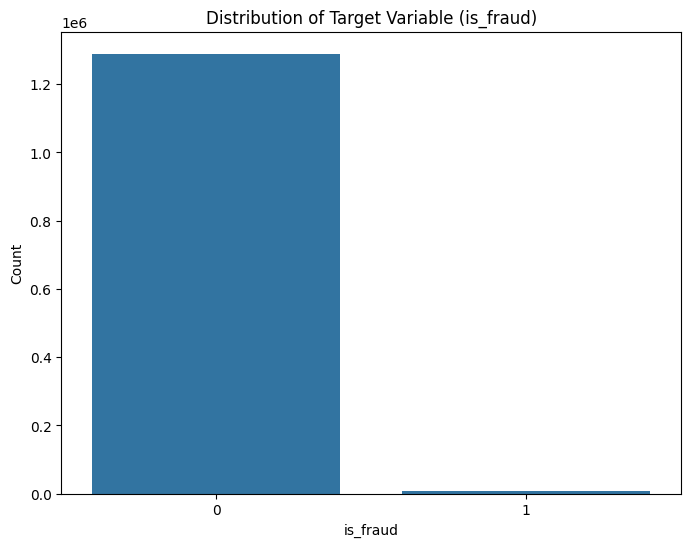

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt


def data_pre(X):
    del_col = ['merchant', 'first', 'last', 'street', 'zip',
               'unix_time', 'Unnamed: 0', 'trans_num', 'cc_num']
    X.drop(columns=del_col, inplace=True)

    X['trans_date_trans_time'] = pd.to_datetime(X['trans_date_trans_time'])
    X['trans_date'] = X['trans_date_trans_time'].dt.strftime('%Y-%m-%d')
    X['trans_date'] = pd.to_datetime(X['trans_date'])
    X['dob'] = pd.to_datetime(X['dob'])

    X["age"] = (X["trans_date"] - X["dob"]).dt.days // 365
    X['trans_month'] = X['trans_date'].dt.month
    X['trans_year'] = X['trans_date'].dt.year

    X['gender'] = X['gender'].apply(lambda x: 1 if x == 'M' else 0)
    X['gender'] = X['gender'].astype(int)

    X['lat_dis'] = abs(X['lat'] - X['merch_lat'])
    X['long_dis'] = abs(X['long'] - X['merch_long'])

    X = pd.get_dummies(X, columns=['category'])
    X = X.drop(columns=['city', 'trans_date_trans_time', 'state', 'job',
               'merch_lat', 'merch_long', 'lat', 'long', 'dob', 'trans_date'])
    return X


train_df_pre = data_pre(train_df.copy())
test_df_pre = data_pre(test_df.copy())


# Visualize the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_df)
plt.title('Distribution of Target Variable (is_fraud)')
plt.xlabel('is_fraud')
plt.ylabel('Count')
plt.show()

Accuracy for Logistic Regression: 0.9956164896287513

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719

Count of Fraud Detected for Logistic Regression: 291


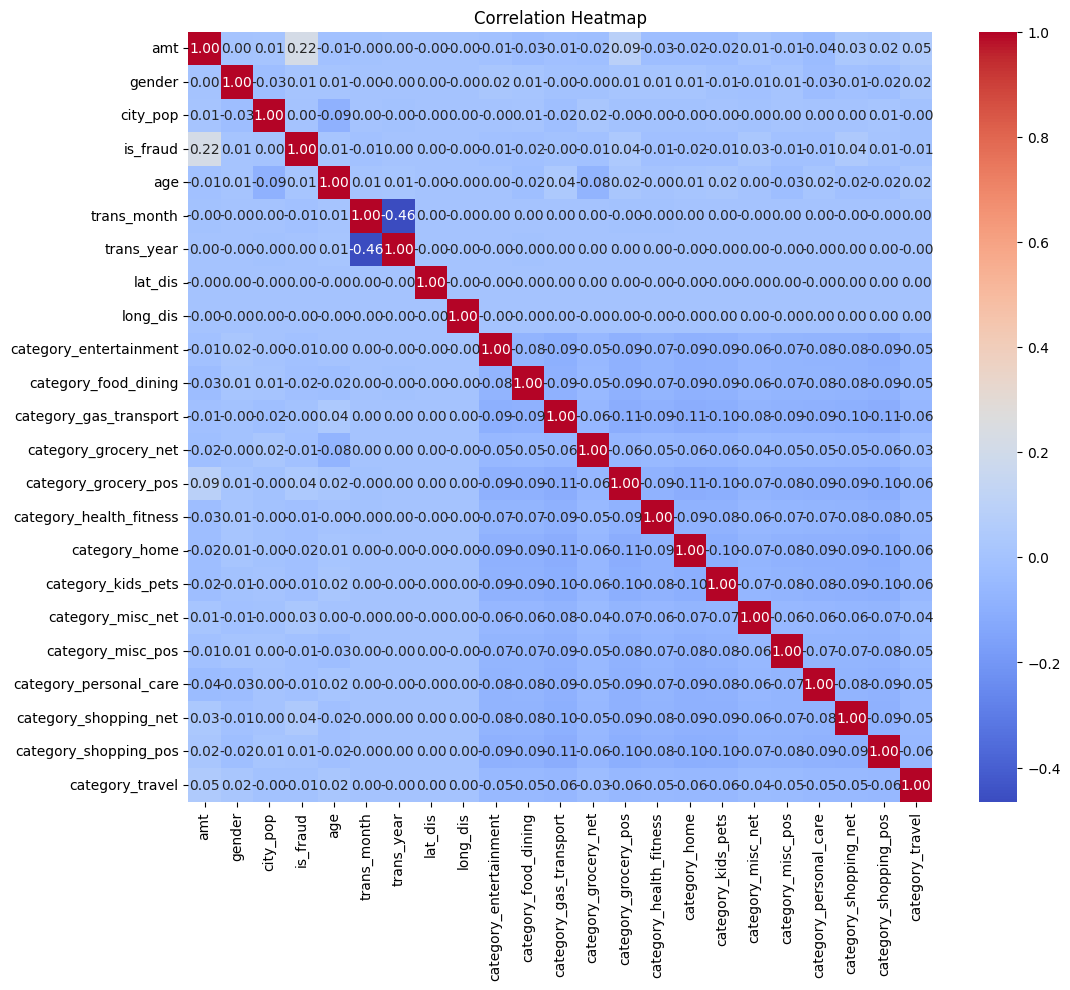

In [57]:
# Split the data into features and labels
x_train = train_df_pre.drop('is_fraud', axis=1)
y_train = train_df_pre['is_fraud']
x_test = test_df_pre.drop('is_fraud', axis=1)
y_test = test_df_pre['is_fraud']

# Fit the StandardScaler on the training data
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression
logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)

y_pred_logistic = logistic_regression.predict(x_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
print("Accuracy for Logistic Regression:", accuracy_logistic)

print("\nClassification Report for Logistic Regression:\n",
      classification_report(y_test, y_pred_logistic))
results_logistic = pd.DataFrame({
    'Card_Identifier': test_df['cc_num'],
    'Logistic_Reg_Detection': y_pred_logistic,
    'Fraud_Status': ['Fraud' if detection == 1 else 'Legitimate' for detection in y_pred_logistic]
})

count_fraud_logistic = 0

for index, row in results_logistic.iterrows():
    if row['Fraud_Status'] == 'Fraud':
        count_fraud_logistic += 1

print(
    f"Count of Fraud Detected for Logistic Regression: {count_fraud_logistic}")

# Visualize correlation between features
plt.figure(figsize=(12, 10))
correlation_matrix = train_df_pre.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Accuracy for Decision Tree: 0.9965666101033076

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.55      0.60      0.58      2145

    accuracy                           1.00    555719
   macro avg       0.77      0.80      0.79    555719
weighted avg       1.00      1.00      1.00    555719

Count of Fraud Detected for Decision Tree: 2355


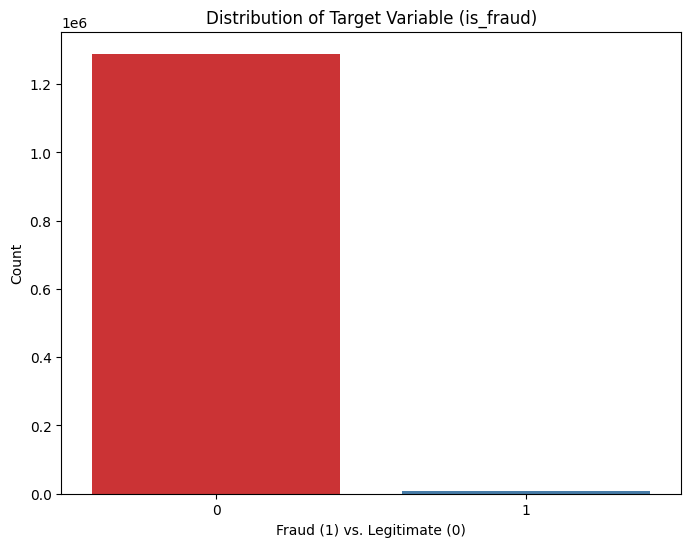

In [58]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

y_pred_dt = decision_tree.predict(x_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Accuracy for Decision Tree:", accuracy_dt)

print("\nClassification Report for Decision Tree:\n",
      classification_report(y_test, y_pred_dt))
results_decision_tree = pd.DataFrame({
    'Card_Identifier': test_df['cc_num'],
    'Decision_Tree_Detection': y_pred_dt,
    'Fraud_Status': ['Fraud' if detection == 1 else 'Legitimate' for detection in y_pred_dt]
})

count_fraud_decision_tree = 0

for index, row in results_decision_tree.iterrows():
    if row['Fraud_Status'] == 'Fraud':
        count_fraud_decision_tree += 1

print(
    f"Count of Fraud Detected for Decision Tree: {count_fraud_decision_tree}")

# Visualize distribution of the target variable 'is_fraud'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_df_pre, palette='Set1')
plt.title('Distribution of Target Variable (is_fraud)')
plt.xlabel('Fraud (1) vs. Legitimate (0)')
plt.ylabel('Count')
plt.show()

In [63]:
# Results Summary
results_summary = pd.DataFrame({
    'Card_Identifier': test_df['cc_num'],
    'Logistic_Reg_Detection': y_pred_logistic,
    'Decision_Tree_Detection': y_pred_dt,
    'Actual_Fraud_Status': y_test,
    'Fraud_Status_LR': ['Fraud' if detection == 1 else 'Legitimate' for detection in y_pred_logistic],
    'Fraud_Status_DT': ['Fraud' if detection == 1 else 'Legitimate' for detection in y_pred_dt],
})

# Display the final results summary
results_summary.head()

,Card_Identifier,Logistic_Reg_Detection,Decision_Tree_Detection,Actual_Fraud_Status,Fraud_Status_LR,Fraud_Status_DT
0,2291163933867244,0,0,0,Legitimate,Legitimate
1,3573030041201292,0,0,0,Legitimate,Legitimate
2,3598215285024754,0,0,0,Legitimate,Legitimate
3,3591919803438423,0,0,0,Legitimate,Legitimate
4,3526826139003047,0,0,0,Legitimate,Legitimate
